# Des dates qui font des nombres premiers ?

Ce petit [notebook Jupyter](https://www.jupyter.org/), écrit en [Python](https://www.python.org/), a pour but de résoudre la question suivante :

> *"En 2017, combien de jours ont leur date qui est un nombre premier ?"*

Par exemple, en 2017, le 23 février donne `23022017` est premier, mais le 24 février donne `24022017` qui ne l'est pas.
On veut trouver toutes les dates en 2017 qui sont des nombres premiers.

----
## 1. Il faut bien poser le problème
- *Q:* Qu'entends-on par *"date qui est un nombre premier"* ?
  - Ça dépend de l'écriture de la date, que ce soit `12012017` pour le 12 janvier ou `01122017`.
  - Dans le doute, la solution présentée ici sera adaptable aux deux cas.
- *Q:* Pourquoi se restreindre à 2017 ?
  - Parce que j'écris ce document en 2017...
  - Parce que c'est un nombre impair, et donc un nombre de la forme `12012017` a une chance d'être premier !
  - Mais dans le doute, la solution présentée ici sera adaptable à n'importe quelle année.
- *Q:* Quelles années ont le plus de dates premières ?
- *Q:* Est-ce qu'on peut inverser la question et chercher quel jour donne le plus de dates premières ?

----
## 2. Une première solution, naïve
- On va d'abord écrire (ou importer) une fonction pour tester si un entier est premier,
- Puis on va écrire une fonction qui transforme une date en son nombre,
- Et enfin une boucle sur les 365 (ou 366) jours de l'année suffira à afficher les jours ayant une date première.

### 2.1. Tester la primalité, version tricheur
[`sympy`](http://www.sympy.org/) propose une fonction [`sympy.isprime`](http://docs.sympy.org/latest/modules/ntheory.html#sympy.ntheory.primetest.isprime).

In [1]:
from sympy import isprime

Elle marche très bien, et est très rapide !

In [2]:
[isprime(i) for i in [2, 3, 5, 7, 10, 11, 13, 17, 2017]]

[True, True, True, True, False, True, True, True, True]

Pour des nombres de 8 chiffres (c'est tout petit), elle est vraiment rapide :

In [3]:
from numpy.random import randint
%timeit sum([isprime(i) for i in randint(1e8, 1e9-1, 10**4)])

10 loops, best of 3: 64.8 ms per loop


$\implies$ $65 ~\text{ms}$ pour 10000 nombres à tester, ça me semble assez rapide pour ce qu'on veut en faire !

----
### 2.2. Transformer une date en nombre
On va utiliser le module [`datetime`](https://docs.python.org/3/library/datetime.html) de la bibliothèque standard :

In [4]:
from datetime import datetime

In [5]:
today = datetime.today()
YEAR = today.year
print("On va travailler avec l'année", YEAR, "!")

On va travailler avec l'année 2017 !


C'est ensuite facile de transformer une date en nombre, selon les deux formats.
On utilise [le formatage avec `.format()`](https://pyformat.info/#datetime) (en Python 3) :

In [6]:
def date_vers_nombre(date):
    return int("{:%d%m%Y}".format(date))

def date_vers_nombre_2(date):
    return int("{:%m%d%Y}".format(date))

In [7]:
date = datetime(YEAR, 1, 12)
print(date_vers_nombre(date))
print(date_vers_nombre_2(date))  # Le 0 initial est ignoré

12012017
1122017


### 2.3. Tester tous les jours de l'année

On peut partir du 1er janvier de cette année, et ajouter des jours un par un.
On utilise un itérateur (avec le mot clé `yield`), pour pouvoir facilement boucler sur tous les jours de l'année en cours :

In [8]:
from datetime import timedelta

def tous_les_jours(year=YEAR):
    date = datetime(year, 1, 1)
    un_jour = timedelta(days=1)
    for i in range(0, 366):
        yield date
        date += un_jour
        if date.year > year:  # On est allé trop loin
            raise StopIteration

On peut vérifier que ça donne ce qu'on voulait :

In [9]:
for date in tous_les_jours():
    print("Le jour {:%d/%m/%Y} donne l'entier {:>8} au format jour-mois-année et {:>8} au format mois-jour-année.".format(date, date_vers_nombre(date), date_vers_nombre_2(date)))

Le jour 01/01/2017 donne l'entier  1012017 au format jour-mois-année et  1012017 au format mois-jour-année.
Le jour 02/01/2017 donne l'entier  2012017 au format jour-mois-année et  1022017 au format mois-jour-année.
Le jour 03/01/2017 donne l'entier  3012017 au format jour-mois-année et  1032017 au format mois-jour-année.
Le jour 04/01/2017 donne l'entier  4012017 au format jour-mois-année et  1042017 au format mois-jour-année.
Le jour 05/01/2017 donne l'entier  5012017 au format jour-mois-année et  1052017 au format mois-jour-année.
Le jour 06/01/2017 donne l'entier  6012017 au format jour-mois-année et  1062017 au format mois-jour-année.
Le jour 07/01/2017 donne l'entier  7012017 au format jour-mois-année et  1072017 au format mois-jour-année.
Le jour 08/01/2017 donne l'entier  8012017 au format jour-mois-année et  1082017 au format mois-jour-année.
Le jour 09/01/2017 donne l'entier  9012017 au format jour-mois-année et  1092017 au format mois-jour-année.
Le jour 10/01/2017 donne l'e

limit_output extension: Maximum message size of 10000 exceeded with 39420 characters

Maintenant, il suffit de boucler, de tester si l'entier est premier, et de n'afficher que ceux qui le sont :

In [11]:
def date_premieres(conversion=date_vers_nombre, year=YEAR):
    for date in tous_les_jours(year):
        if isprime(conversion(date)):
            yield date

On peut aussi facilement trouver la prochaine date qui sera première :

In [12]:
def prochaine_date_premiere(date=datetime.today(), conversion=date_vers_nombre):
    year = date.year
    un_jour = timedelta(days=1)
    for i in range(0, 366):
        if isprime(conversion(date)):
            return date
        date += un_jour
        if date.year > year:  # On est allé trop loin
            return None
    return None

In [13]:
date = datetime.today()
prochain = prochaine_date_premiere(date)
print("Pour le jour d'aujourd'hui ({:%x}), le prochain jour ayant une date première dans l'année {} est : {:%x} !".format(date, date.year, prochain))

Pour le jour d'aujourd'hui (02/24/17), le prochain jour ayant une date première dans l'année 2017 est : 03/06/17 !


#### Pour les dates écrites "jour mois année" :

In [14]:
for date in date_premieres(date_vers_nombre):
    print("Le jour {:%d/%m/%Y} donne l'entier {:>8} qui est premier !".format(date, date_vers_nombre(date)))

Le jour 03/01/2017 donne l'entier  3012017 qui est premier !
Le jour 11/01/2017 donne l'entier 11012017 qui est premier !
Le jour 12/01/2017 donne l'entier 12012017 qui est premier !
Le jour 18/01/2017 donne l'entier 18012017 qui est premier !
Le jour 27/01/2017 donne l'entier 27012017 qui est premier !
Le jour 29/01/2017 donne l'entier 29012017 qui est premier !
Le jour 01/02/2017 donne l'entier  1022017 qui est premier !
Le jour 02/02/2017 donne l'entier  2022017 qui est premier !
Le jour 04/02/2017 donne l'entier  4022017 qui est premier !
Le jour 08/02/2017 donne l'entier  8022017 qui est premier !
Le jour 10/02/2017 donne l'entier 10022017 qui est premier !
Le jour 17/02/2017 donne l'entier 17022017 qui est premier !
Le jour 20/02/2017 donne l'entier 20022017 qui est premier !
Le jour 23/02/2017 donne l'entier 23022017 qui est premier !
Le jour 06/03/2017 donne l'entier  6032017 qui est premier !
Le jour 09/03/2017 donne l'entier  9032017 qui est premier !
Le jour 10/03/2017 donne

#### Pour les dates écrites "mois jour année" :

In [15]:
for date in date_premieres(date_vers_nombre_2):
    print("Le jour {:%d/%m/%Y} donne l'entier {:>8} qui est premier !".format(date, date_vers_nombre_2(date)))

Le jour 02/01/2017 donne l'entier  1022017 qui est premier !
Le jour 08/01/2017 donne l'entier  1082017 qui est premier !
Le jour 11/01/2017 donne l'entier  1112017 qui est premier !
Le jour 14/01/2017 donne l'entier  1142017 qui est premier !
Le jour 20/01/2017 donne l'entier  1202017 qui est premier !
Le jour 21/01/2017 donne l'entier  1212017 qui est premier !
Le jour 26/01/2017 donne l'entier  1262017 qui est premier !
Le jour 30/01/2017 donne l'entier  1302017 qui est premier !
Le jour 02/02/2017 donne l'entier  2022017 qui est premier !
Le jour 04/02/2017 donne l'entier  2042017 qui est premier !
Le jour 11/02/2017 donne l'entier  2112017 qui est premier !
Le jour 19/02/2017 donne l'entier  2192017 qui est premier !
Le jour 23/02/2017 donne l'entier  2232017 qui est premier !
Le jour 25/02/2017 donne l'entier  2252017 qui est premier !
Le jour 26/02/2017 donne l'entier  2262017 qui est premier !
Le jour 28/02/2017 donne l'entier  2282017 qui est premier !
Le jour 01/03/2017 donne

#### Comparaison
Il y a 71 jours, en 2017, qui ont une date première si on les écrit "jour mois année", et 69 si on les écrits "mois jour année".

In [16]:
len(list(date_premieres(date_vers_nombre)))

71

In [17]:
len(list(date_premieres(date_vers_nombre_2)))

69

----
## 3. Résolvons le problème pour toutes les années entre 0 AC et 2500 AC

On aimerait afficher une courbe montrant l'évolution du nombre de dates premières au cours des années, selon les deux formats.

In [18]:
def nombres_dates_premieres(year=YEAR):
    if year % 2 == 0:
        return [0, 0]
    else:
        return [len(list(date_premieres(date_vers_nombre, year=year))), len(list(date_premieres(date_vers_nombre_2, year=year)))]

In [19]:
nombres_dates_premieres()

[71, 69]

On vérifie que pour les années paires il n'y a pas de dates premières :

In [20]:
len(list(date_premieres(date_vers_nombre, year=2016)))

0

On peut donc récupérer toutes ces nombres, jusqu'à l'année 3000.
(On pourrait gagner du temps en ne considérant que les années impaires, et l'année 1)

In [21]:
import numpy as np

def intervale_nombres_dates_premieres(year1=1, year2=3000):
    nombres = np.zeros((year2 - year1 + 1, 2))
    for i, year in enumerate(range(year1, year2 + 1)):
        nombres[i, :] = nombres_dates_premieres(year)
    return nombres

On essaie sur un intervale de 11 ans :

In [22]:
%%time
nombres = intervale_nombres_dates_premieres(year1=2010, year2=2020)
print(nombres)

[[  0.   0.]
 [ 46.  50.]
 [  0.   0.]
 [ 52.  51.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 71.  69.]
 [  0.   0.]
 [ 50.  58.]
 [  0.   0.]]
CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 65 ms


In [23]:
%%time
nombres = intervale_nombres_dates_premieres(year1=1, year2=3000)
print(nombres)

[[ 108.  108.]
 [   0.    0.]
 [  98.  104.]
 ..., 
 [   0.    0.]
 [  64.   55.]
 [   0.    0.]]
CPU times: user 15.6 s, sys: 20 ms, total: 15.6 s
Wall time: 15.6 s


In [24]:
np.shape(nombres)

(3000, 2)

Quelques statistiques :

In [25]:
print("- Au format jour-mois-année, il y a en moyenne {:.3g} jours premiers par an.".format(np.mean(nombres[:, 0])))
print("- Et en moyenne {:.3g} jours premiers par an, en enlevant les années paires.".format(np.mean(nombres[:, 0][nombres[:, 0] > 0])))

print("- Au format mois-jour-année, il y a en moyenne {:.3g} jours premiers par an.".format(np.mean(nombres[:, 1])))
print("- Et en moyenne {:.3g} jours premiers par an, en enlevant les années paires.".format(np.mean(nombres[:, 1][nombres[:, 1] > 0])))

- Au format jour-mois-année, il y a en moyenne 23.9 jours premiers par an.
- Et en moyenne 59.7 jours premiers par an, en enlevant les années paires.
- Au format mois-jour-année, il y a en moyenne 25.2 jours premiers par an.
- Et en moyenne 63 jours premiers par an, en enlevant les années paires.


On va afficher tout ça :

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.4)

In [37]:
def affiche_nombres_dates_premieres(nombres):
    plt.figure()
    plt.plot(nombres[:, 0], 'b.', label="Format jour-mois-année")
    plt.plot(nombres[:, 1], 'g*', label="Format mois-jour-année")
    plt.title("Nombres de dates premières par an")
    plt.legend(loc='best', numpoints=1, fancybox=True, shadow=True, framealpha=0.8)
    plt.xlabel("Année")
    plt.ylabel("Nombre de dates premières")

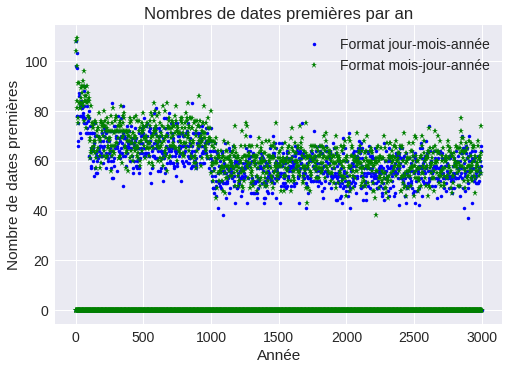

In [38]:
affiche_nombres_dates_premieres(nombres)

Avec un histogramme :

In [39]:
def hist_nombres_dates_premieres(nombres, ind=0):
    nbs = nombres[:, ind]
    nbs = nbs[nbs > 0]
    plt.figure()
    plt.hist(nbs, bins=100, label="Format %s-année" % ('jour-mois' if ind==0 else 'mois-jour'), color='bg'[ind])
    plt.title("Répartition du nombres de dates premières par an")
    plt.legend(loc='best', numpoints=1, fancybox=True, shadow=True, framealpha=0.8)
    plt.xlabel("Nombres de dates premières")
    plt.ylabel("Nombres")

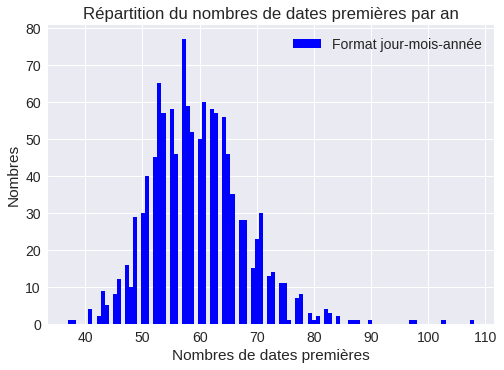

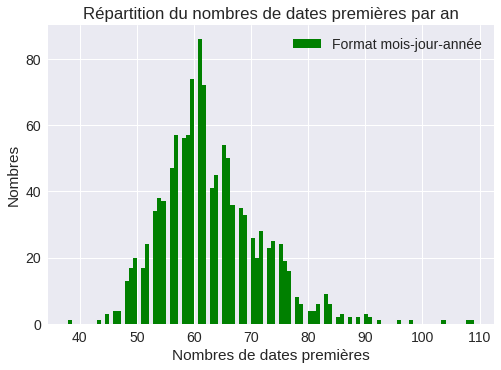

In [40]:
hist_nombres_dates_premieres(nombres, 0)
hist_nombres_dates_premieres(nombres, 1)

## 4. Quels jours donnent le plus de nombres premiers ?

On peut se poser une autre question : quelle date donne le plus de nombres premiers ?

On a vu que le 23 février donne `23022017` qui est premier, et `24022017` ne l'est pas.
Mais en sur 3000 années successives, est-ce que le 23 février donne plus souvent un nombre premier que le 24 février ?

In [49]:
def meme_jour_toutes_les_annees(days=0, year1=1, year2=3000):
    date = datetime(year1, 1, 1)
    date += timedelta(days=days)
    for i, year in enumerate(range(year1, year2 + 1)):
        yield date.replace(year=year)

In [52]:
list(meme_jour_toutes_les_annees(days=31+22, year1=2017, year2=2019))

[datetime.datetime(2017, 2, 23, 0, 0),
 datetime.datetime(2018, 2, 23, 0, 0),
 datetime.datetime(2019, 2, 23, 0, 0)]

In [53]:
def nombre_annees_qui_donnent_date_premiere(days=0, year1=1, year2=3000, conversion=date_vers_nombre):
    for date in meme_jour_toutes_les_annees(days=days, year1=year1, year2=year2):
        if isprime(conversion(date)):
            yield date

Par exemple, pour mon anniversaire, entre ma naissance et maintenant, une seule année a donné une date `1201YEAR` qui soit première :

In [59]:
list(nombre_annees_qui_donnent_date_premiere(days=11, year1=1993, year2=2017))

[datetime.datetime(2017, 1, 12, 0, 0)]

Le 23 février a plus de chance :

In [61]:
list(nombre_annees_qui_donnent_date_premiere(days=31+22, year1=1993, year2=2017))

[datetime.datetime(1993, 2, 23, 0, 0),
 datetime.datetime(2001, 2, 23, 0, 0),
 datetime.datetime(2017, 2, 23, 0, 0)]

On peut récupérer ces données pour tous les jours de l'année :

In [62]:
def histogramme_par_jours(year1=1, year2=3000, conversion=date_vers_nombre):
    jours = np.zeros(366)
    for days in range(366):
        jours[days] += len(list(nombre_annees_qui_donnent_date_premiere(days=days, year1=year1, year2=year2, conversion=conversion)))
    return jours

In [68]:
%%time
jours = histogramme_par_jours(year1=1993, year2=2017)
jours

CPU times: user 124 ms, sys: 0 ns, total: 124 ms
Wall time: 126 ms


In [73]:
%%time
jours_format1 = histogramme_par_jours(year1=1, year2=3000, conversion=date_vers_nombre)
jours_format1 /= 3000

CPU times: user 11.9 s, sys: 0 ns, total: 11.9 s
Wall time: 11.9 s


In [74]:
%%time
jours_format2 = histogramme_par_jours(year1=1, year2=3000, conversion=date_vers_nombre_2)
jours_format2 /= 3000

CPU times: user 11.8 s, sys: 0 ns, total: 11.8 s
Wall time: 11.8 s


### 4.1. Visualisations, jour par jour

Exploitons ces données :

In [75]:
def hist_nombres_dates_premieres(jours, ind=0):
    plt.figure()
    plt.plot(jours, label="Format %s-année" % ('jour-mois' if ind==0 else 'mois-jour'), color='bg'[ind])
    plt.title("Répartition du nombres de dates premières selon la date\nEntre l'an 1 et l'an 3000")
    plt.legend(loc='best', numpoints=1, fancybox=True, shadow=True, framealpha=0.8)
    plt.xlabel("Jour dans l'année")
    plt.ylabel("Fréquence")

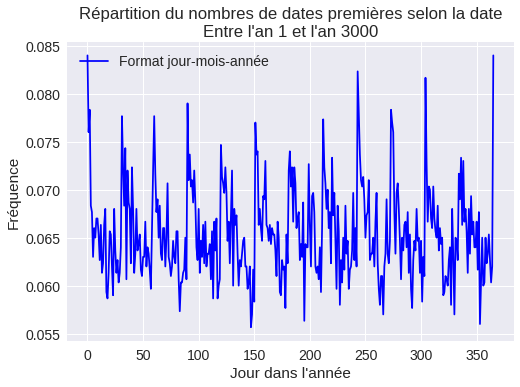

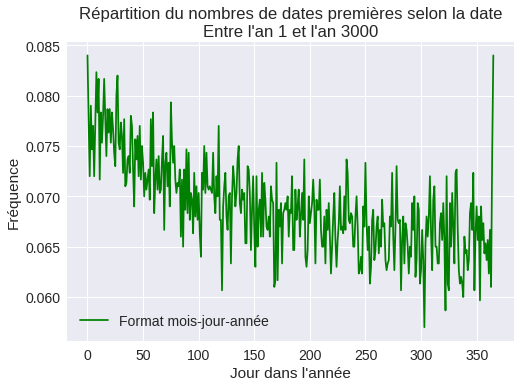

In [76]:
hist_nombres_dates_premieres(jours_format1, ind=0)
hist_nombres_dates_premieres(jours_format2, ind=1)

In [94]:
def txt_date_de_jour(days):
    date = datetime(year=1, day=1, month=1) + timedelta(days=int(days))
    return "{:%d/%m}".format(date)

### 4.2. Quelle jour donne le plus de dates premières ?
Sans trop de surprise, c'est le 1er janvier qui gagne, pour les deux cas :

In [98]:
txt_date_de_jour(np.argmax(jours_format1))
txt_date_de_jour(np.argmax(jours_format2))

'01/01'

'01/01'

Mais en enlevant le 1er janvier et le dernier jour de l'année, on trouve une différence :

In [100]:
np.argmax(jours_format1[1:-1])
txt_date_de_jour(_)

np.argmax(jours_format2[1:-1])
txt_date_de_jour(_)

242

'31/08'

7

'08/01'

----
## 5. Conclusions
- Pour les années impaires, il y a en moyenne une soixantaine de jours qui ont une date première !s, 
- Le nombre est quasiment identique selon les deux formats, `jour-mois` ou `mois-jour`.

Ce n'était pas très dur à calculer, mais intéressant.

- Et en moyenne, un certain jour a entre 6% et 8% de donner une date première, entre l'an 1 et l'an 3000.
- Avec les deux formats, le 1er janvier est le jour qui donne le plus de dates premières, et puis le 31 décembre, puis le 31 août pour le format `jour-mois` et le 8 janvier pour le format `mois-jour`.

> C'est tout pour aujourd'hui les amis, [allez voir d'autres notebooks si vous êtes curieux !](https://github.com/Naereen/notebooks/).

> [See this repository for other Python notebook doing numerical simulations](https://github.com/Naereen/notebooks/tree/master/simus/).